In [1]:
import pandas as pd
import numpy as np
import cv2

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls drive/MyDrive/TeacherOn\ Assignment/Akash_code/Project2/AppleImages

In [ ]:
class_dict = {'Apple___Apple_scab':0, 'Apple___Cedar_apple_rust':1,
              'Apple___Black_rot':2, 'Apple___healthy':3}

img_size = 82
X = np.zeros((1, img_size*img_size*3))
y = [0]

print(X.shape)

# root = 'drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/AppleImages/'

# for key in class_dict:
#     files = os.listdir(root + key)
#     for file in files:
#         try:
#             # print(root + key + '/' + file)
#             img = cv2.imread(root + key + '/' + file)
#             img = cv2.resize(img, (img_size, img_size))
#             # print(img.shape)
#             X = np.concatenate((X, img.reshape((1, img_size*img_size*3))))
#             y.append(class_dict[key])
#         except Exception as e:
#             print(e)


data = pd.read_csv('drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/image_csv.csv')
# data = pd.read_csv('image_csv.csv')

X = data.iloc[:, :-2].values
y = data.iloc[:, -1]


y = np.array(y)
print(X.shape)
print(y.shape)

(1, 20172)
(3172, 20172)
(3172,)


In [ ]:
X = X.astype(int)

In [ ]:
data.shape

(3172, 20174)

In [ ]:
# df = pd.DataFrame(X)
# df['output'] = y
# df.to_csv('drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/image_csv.csv')
# # pd.DataFrame(X).to_csv('drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/image_csv.csv')

(82, 82, 3)


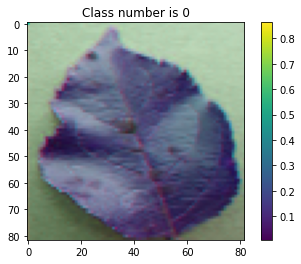

In [ ]:
# Display a random image
temp_img = X[2].reshape((img_size, img_size, 3)).copy()/255
print(temp_img.shape)
c = plt.imshow(temp_img)
plt.colorbar(c)
plt.title(f'Class number is {y[200]}')
plt.show()

In [ ]:
def normalize(x):
    # Normalize the pixel values
    x_n = (x - 0)/(255)
    return x_n

In [ ]:
X = normalize(X)
print(X.shape)

(3172, 20172)


In [ ]:
# One hot encoding of the output
def oneHot(y, Ny):
    y_oh = np.zeros((len(y), Ny))
    for i in range(len(y)):
      y_oh[i][y[i]] = 1
    return y_oh

y_oh = oneHot(y, 4)
print(y_oh.shape)
print(y_oh[3000])

(3172, 4)
[0. 0. 0. 1.]


In [ ]:
# X.reshape((3172, img_size*img*img_size*3))

In [ ]:
# create_samples = 
Apple___Apple_scab = X[y == 0][1:2]
Apple___Cedar_apple_rust = X[y == 1][:1]
Apple___Black_rot = X[y == 2][:1]
Apple___healthy = X[y == 3][:1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_oh)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y)

In [ ]:
X_train1.shape

(2379, 20172)

In [ ]:
y_train1.shape

(2379,)

## SVM Model

In [ ]:
from sklearn.svm import SVC


img_svm = SVC(probability=True)


In [ ]:
img_svm.fit(X_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve
def get_results(pred, y_test):
  print(classification_report(y_test, pred))
  print(confusion_matrix(y_test, pred))


In [ ]:
pred = img_svm.predict(X_test)
get_results(pred, y_test1)

              precision    recall  f1-score   support

           0       0.22      0.20      0.21       169
           1       0.04      0.05      0.05        63
           2       0.22      0.23      0.23       159
           3       0.49      0.50      0.49       402

    accuracy                           0.34       793
   macro avg       0.24      0.24      0.24       793
weighted avg       0.34      0.34      0.34       793

[[ 34  15  34  86]
 [  9   3  13  38]
 [ 22  14  36  87]
 [ 89  36  78 199]]


In [ ]:
class_dict = {'Apple___Apple_scab':0, 'Apple___Cedar_apple_rust':1,
              'Apple___Black_rot':2, 'Apple___healthy':3}
num_to_class = {b:a for a,b in class_dict.items()}

def testsample(model, **kwargs):
    for item in kwargs:
        pred = model.predict(kwargs[item])
        temp_img = kwargs[item][0].reshape((img_size, img_size, 3)).copy()
        c = plt.imshow(temp_img)
        plt.colorbar(c)
        plt.title(f'Predicted Class is {num_to_class[pred.argmax()]}\nActual Clas is {item}')
        plt.show()

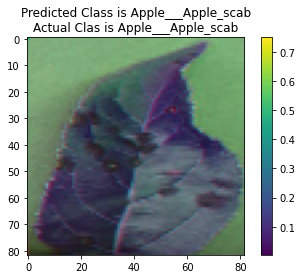

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


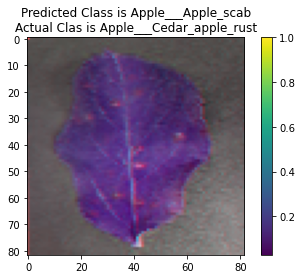

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


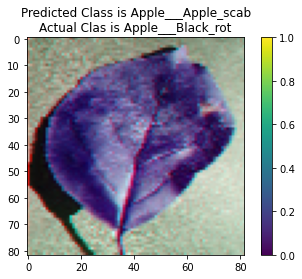

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


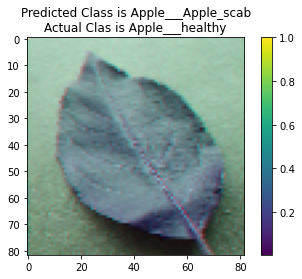

In [ ]:
testsample(img_svm, Apple___Apple_scab = Apple___Apple_scab, 
           Apple___Cedar_apple_rust = Apple___Cedar_apple_rust, 
           Apple___Black_rot = Apple___Black_rot, 
           Apple___healthy = Apple___healthy)

## Simple CNN Model

In [ ]:
X_train, X_test = X_train.reshape((-1, 82, 82, 3)), X_test.reshape((-1, 82, 82, 3))

In [ ]:
# importing the required libraries for creating required model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

def create_model():
    def model_emotion(input_shape, num_classes, l2_regularization=0.01):
        regularization = l2(l2_regularization)

        # base
        img_input = Input(input_shape)
        x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                   use_bias=False)(img_input)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(num_classes, (3, 3),
                   kernel_regularizer=regularization,
                   padding='same')(x)
        x = GlobalAveragePooling2D()(x)
        output = Activation('softmax', name='predictions')(x)

        model = Model(img_input, output)
        return model
    model = model_emotion((img_size, img_size, 3), 4)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

model = create_model()

# printing model summary
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 82, 82, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 80, 80, 8)         216       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 8)         32        
_________________________________________________________________
activation (Activation)      (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 4)         292       
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0         
_________________________________________________________________
predictions (Activation)     (None, 4)                 0     

In [ ]:
# training the model
import tensorflow as tf
tf.config.run_functions_eagerly(True)

history = model.fit(X_train, y_train, validation_split = 0.1, epochs=5, batch_size=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/5
11/11 [==============================] - 15s 1s/step - loss: 1.3577 - accuracy: 0.4890 - val_loss: 1.4223 - val_accuracy: 0.5168
Epoch 2/5
11/11 [==============================] - 14s 1s/step - loss: 1.2417 - accuracy: 0.5199 - val_loss: 1.3983 - val_accuracy: 0.5168
Epoch 3/5
11/11 [==============================] - 15s 1s/step - loss: 1.1795 - accuracy: 0.5213 - val_loss: 1.3765 - val_accuracy: 0.5168
Epoch 4/5
11/11 [==============================] - 14s 1s/step - loss: 1.1271 - accuracy: 0.5250 - val_loss: 1.3679 - val_accuracy: 0.5168
Epoch 5/5
11/11 [==============================] - 14s 1s/step - loss: 1.0778 - accuracy: 0.5483 - val_loss: 1.3435 - val_accuracy: 0.5168


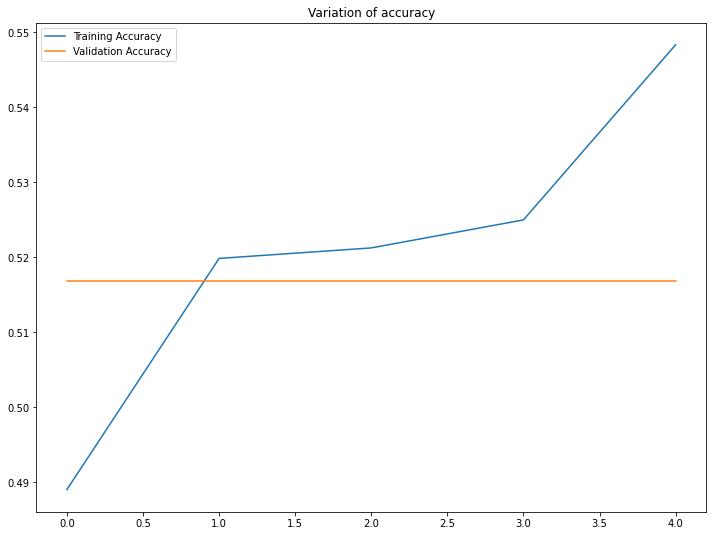

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Variation of accuracy')
plt.legend()

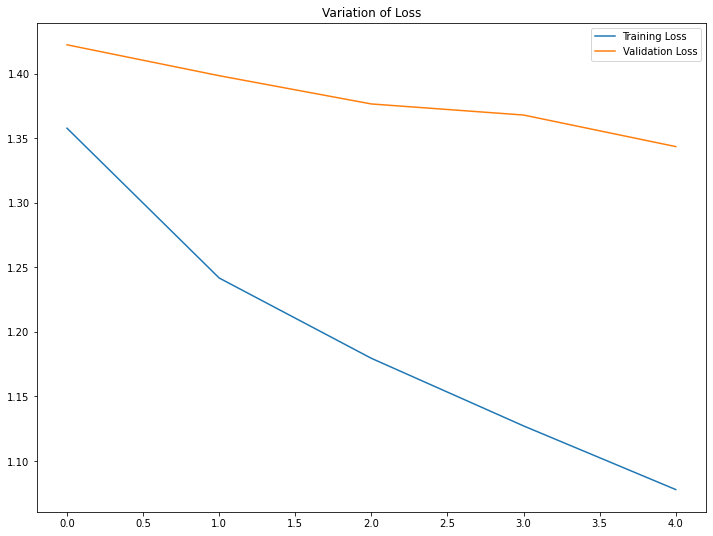

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Variation of Loss')
plt.legend()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


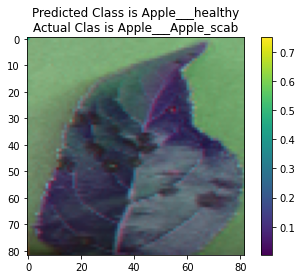

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


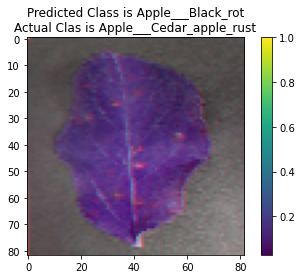

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


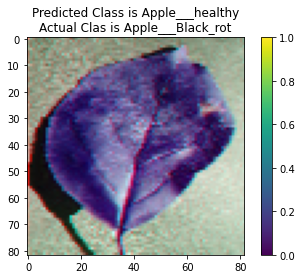

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


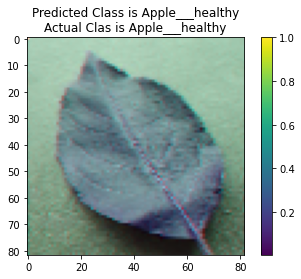

In [ ]:
testsample(model, Apple___Apple_scab = Apple___Apple_scab.reshape((-1, 82, 82, 3)), 
           Apple___Cedar_apple_rust = Apple___Cedar_apple_rust.reshape((-1, 82, 82, 3)), 
           Apple___Black_rot = Apple___Black_rot.reshape((-1, 82, 82, 3)), 
           Apple___healthy = Apple___healthy.reshape((-1, 82, 82, 3)))

## Slightly deep CNN 

In [ ]:
def create_model():
    def model_emotion(input_shape, num_classes, l2_regularization=0.01):
        regularization = l2(l2_regularization)

        # base
        img_input = Input(input_shape)
        x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                   use_bias=False)(img_input)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        residual = Conv2D(128, (1, 1), strides=(2, 2),
                          padding='same', use_bias=False)(x)
        residual = BatchNormalization()(residual)

        x = SeparableConv2D(128, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv2D(128, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        x = layers.add([x, residual])

        x = Conv2D(num_classes, (3, 3),
                   kernel_regularizer=regularization,
                   padding='same')(x)
        x = GlobalAveragePooling2D()(x)
        output = Activation('softmax', name='predictions')(x)

        model = Model(img_input, output)
        return model
    model = model_emotion((img_size, img_size, 3), 4)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

model = create_model()

# printing model summary
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 82, 82, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 80, 80, 8)    216         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 80, 80, 8)    32          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 80, 80, 8)    0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
# training the model
import tensorflow as tf
tf.config.run_functions_eagerly(True)

history = model.fit(X_train, y_train, validation_split = 0.1, epochs=5, batch_size=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/5
11/11 [==============================] - 197s 18s/step - loss: 1.0903 - accuracy: 0.6273 - val_loss: 1.4745 - val_accuracy: 0.4706
Epoch 2/5
11/11 [==============================] - 176s 16s/step - loss: 0.7010 - accuracy: 0.7847 - val_loss: 1.4606 - val_accuracy: 0.5294
Epoch 3/5
11/11 [==============================] - 178s 16s/step - loss: 0.6334 - accuracy: 0.8052 - val_loss: 1.4581 - val_accuracy: 0.5546
Epoch 4/5
11/11 [==============================] - 173s 16s/step - loss: 0.6070 - accuracy: 0.8160 - val_loss: 1.4761 - val_accuracy: 0.3824
Epoch 5/5
11/11 [==============================] - 176s 16s/step - loss: 0.5328 - accuracy: 0.8384 - val_loss: 1.4849 - val_accuracy: 0.2227


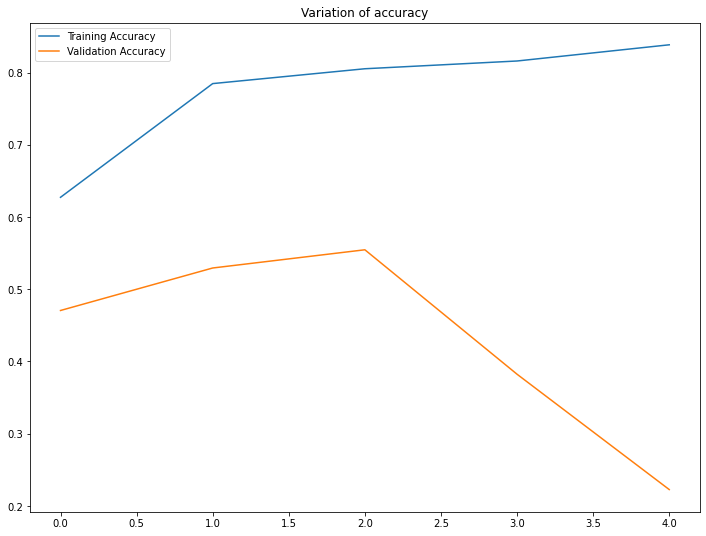

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Variation of accuracy')
plt.legend()

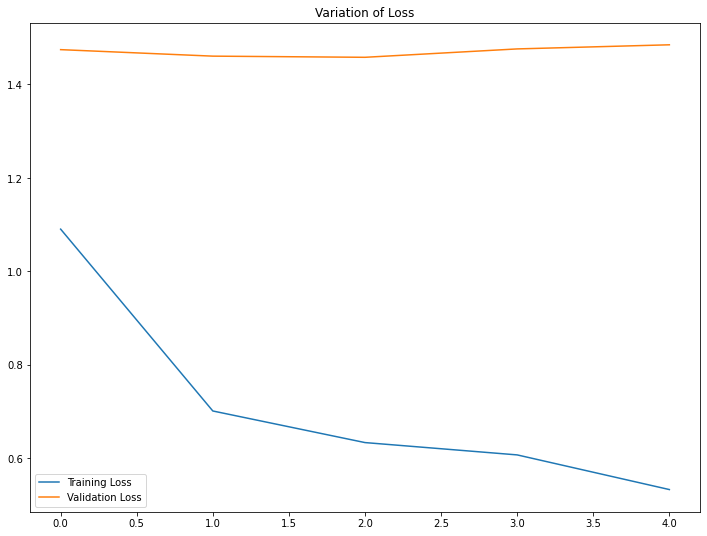

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Variation of Loss')
plt.legend()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


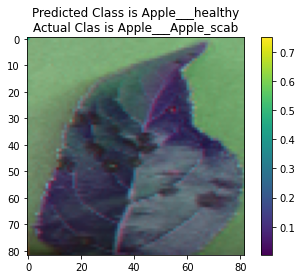

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


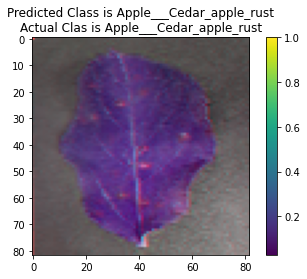

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


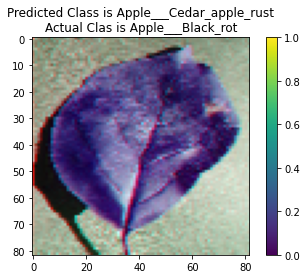

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


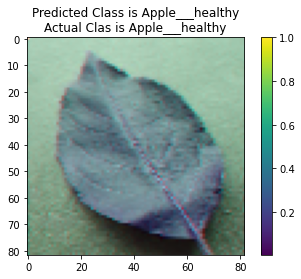

In [ ]:
testsample(model, Apple___Apple_scab = Apple___Apple_scab.reshape((-1, 82, 82, 3)), 
           Apple___Cedar_apple_rust = Apple___Cedar_apple_rust.reshape((-1, 82, 82, 3)), 
           Apple___Black_rot = Apple___Black_rot.reshape((-1, 82, 82, 3)), 
           Apple___healthy = Apple___healthy.reshape((-1, 82, 82, 3)))

# Improved CNN model with augumentation in the data

## CNN with apple leaf images

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.regularizers import l2
train_data_dir = 'drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/AppleImages/'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# dimensions of our images.
img_width, img_height = 128, 128
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = create_model()

# this is the augmentation configuration we will use for training

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split = 0.30)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 2221 images belonging to 4 classes.
Found 950 images belonging to 4 classes.


In [5]:
X, y = next(train_generator)
X.shape, y.shape

((16, 128, 128, 3), (16, 4))

In [8]:
(X[0]*255).max()

221.23279

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.regularizers import l2




train_data_dir = 'drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/AppleImages/'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# dimensions of our images.
img_width, img_height = 128, 128
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = create_model()

# this is the augmentation configuration we will use for training

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split = 0.30)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'validation')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)

model.save_weights('apple_cnn1.h5')




Found 2221 images belonging to 4 classes.
Found 950 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
125/125 [==============================] - 162s 1s/step - loss: 1.1323 - accuracy: 0.5764 - val_loss: 0.7513 - val_accuracy: 0.7088
Epoch 2/50
125/125 [==============================] - 59s 475ms/step - loss: 0.8375 - accuracy: 0.6790 - val_loss: 0.8378 - val_accuracy: 0.6650
Epoch 3/50
125/125 [==============================] - 48s 381ms/step - loss: 0.7295 - accuracy: 0.7211 - val_loss: 0.5467 - val_accuracy: 0.8087
Epoch 4/50
125/125 [==============================] - 44s 354ms/step - loss: 0.6545 - accuracy: 0.7495 - val_loss: 0.5078 - val_accuracy: 0.8163
Epoch 5/50
125/125 [==============================] - 44s 354ms/step - loss: 0.6008 - accuracy: 0.7827 - val_loss: 0.3853 - val_accuracy: 0.8813
Epoch 6/50
125/125 [==============================] - 44s 354ms/step - loss: 0.5248 - accuracy: 0.8037 - val_loss: 0.4115 - val_accuracy: 0.8575
Epoch 7/50
125/125 [==============================] - 44s 354ms/step - loss: 0.5270 - accuracy: 0.8182 - val_loss: 0.3815 - val_accu

In [ ]:
history = model.history

### Plotting the Accuracy

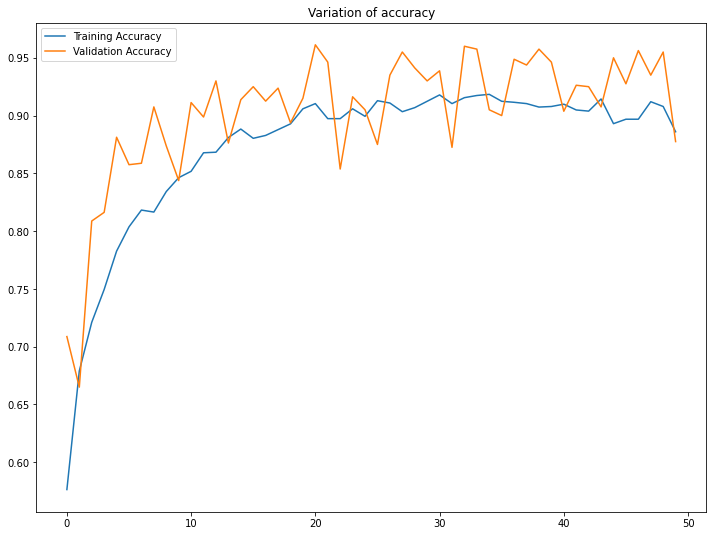

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Variation of accuracy')
plt.legend()

### Plotting the Loss

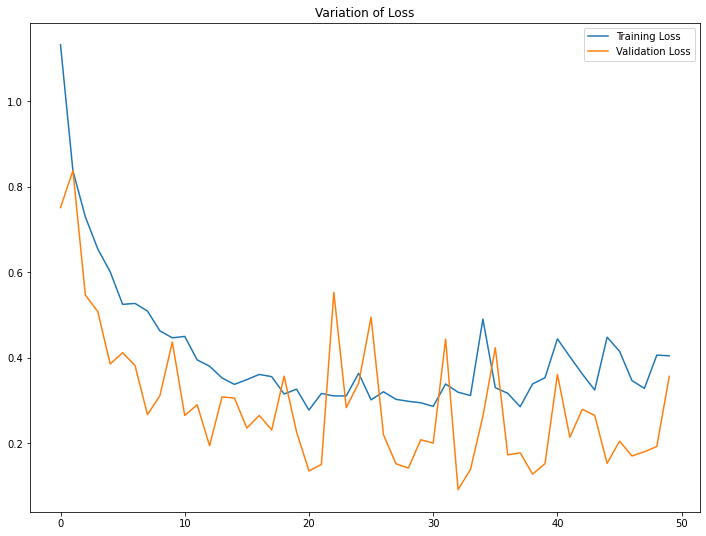

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Variation of Loss')
plt.legend()

### Look for the classification of some feature

In [ ]:
class_dict = {'Apple___Apple_scab':0, 'Apple___Cedar_apple_rust':2,
              'Apple___Black_rot':1, 'Apple___healthy':3}
num_to_class = {b:a for a,b in class_dict.items()}
img_size = 128
def testsample(model, **kwargs):
    for item in kwargs:
        pred = model.predict(kwargs[item])
        temp_img = kwargs[item][0].reshape((img_size, img_size, 3)).copy()
        c = plt.imshow(temp_img)
        plt.colorbar(c)
        plt.title(f'Predicted Class is {num_to_class[pred.argmax()]}\nActual Clas is {item}')
        plt.show()

In [ ]:
X, y = next(validation_generator)
y1 = y.argmax(axis = 1)
X.shape, y1.shape

((16, 128, 128, 3), (16,))

In [ ]:
Apple___Apple_scab = X[y1 == 0][1:2]
Apple___Cedar_apple_rust = X[y1 == 2][:1]
Apple___Black_rot = X[y1 == 1][:1]
Apple___healthy = X[y1 == 3][:1]

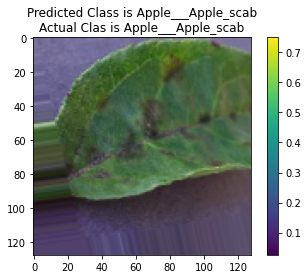

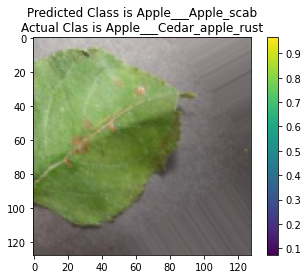

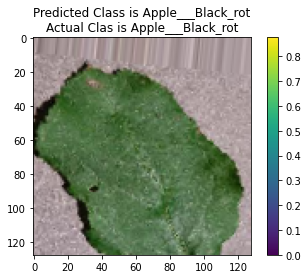

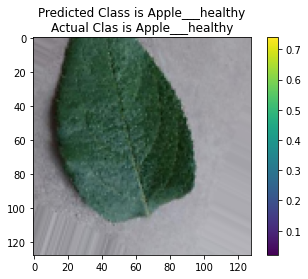

In [ ]:
testsample(model, Apple___Apple_scab = Apple___Apple_scab.reshape((-1, 128, 128, 3)), 
           Apple___Cedar_apple_rust = Apple___Cedar_apple_rust.reshape((-1, 128, 128, 3)), 
           Apple___Black_rot = Apple___Black_rot.reshape((-1, 128, 128, 3)), 
           Apple___healthy = Apple___healthy.reshape((-1, 128, 128, 3)))

## CNN with grape leaf images

In [ ]:
# dimensions of our images.
img_width, img_height = 128, 128

train_data_dir = 'drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/GrapeImages/'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = create_model()

# this is the augmentation configuration we will use for training

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split = 0.30)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'validation')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size)

model.save_weights('grape_cnn1.h5')

Found 2846 images belonging to 4 classes.
Found 1216 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
125/125 [==============================] - 48s 376ms/step - loss: 1.2354 - accuracy: 0.4484 - val_loss: 0.9447 - val_accuracy: 0.5275
Epoch 2/50
125/125 [==============================] - 46s 367ms/step - loss: 0.9862 - accuracy: 0.5626 - val_loss: 1.0707 - val_accuracy: 0.5275
Epoch 3/50
125/125 [==============================] - 45s 362ms/step - loss: 0.8255 - accuracy: 0.6471 - val_loss: 0.8282 - val_accuracy: 0.6888
Epoch 4/50
125/125 [==============================] - 45s 363ms/step - loss: 0.7211 - accuracy: 0.7122 - val_loss: 0.5803 - val_accuracy: 0.7500
Epoch 5/50
125/125 [==============================] - 45s 360ms/step - loss: 0.6649 - accuracy: 0.7510 - val_loss: 0.6100 - val_accuracy: 0.7412
Epoch 6/50
125/125 [==============================] - 45s 357ms/step - loss: 0.6081 - accuracy: 0.7908 - val_loss: 0.3484 - val_accuracy: 0.8788
Epoch 7/50
125/125 [==============================] - 45s 362ms/step - loss: 0.5733 - accuracy: 0.8298 - val_loss: 0.3218 - val_ac

In [ ]:
history = model.history

### Plotting the Accuracy

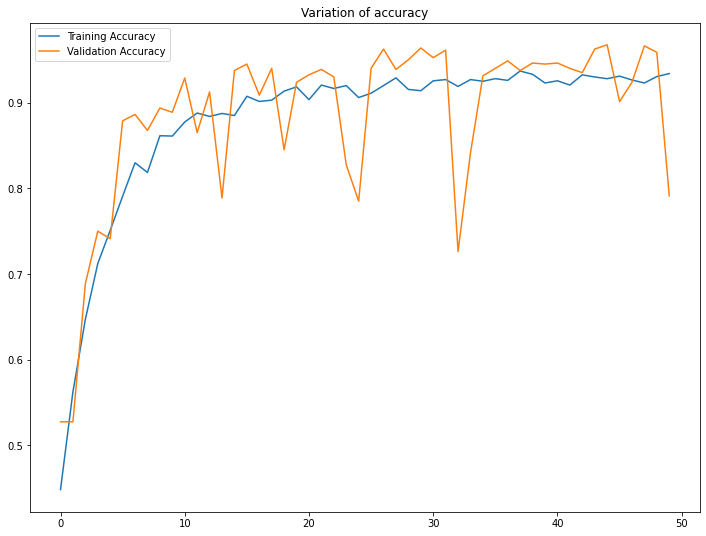

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Variation of accuracy')
plt.legend()

### Plotting the Loss

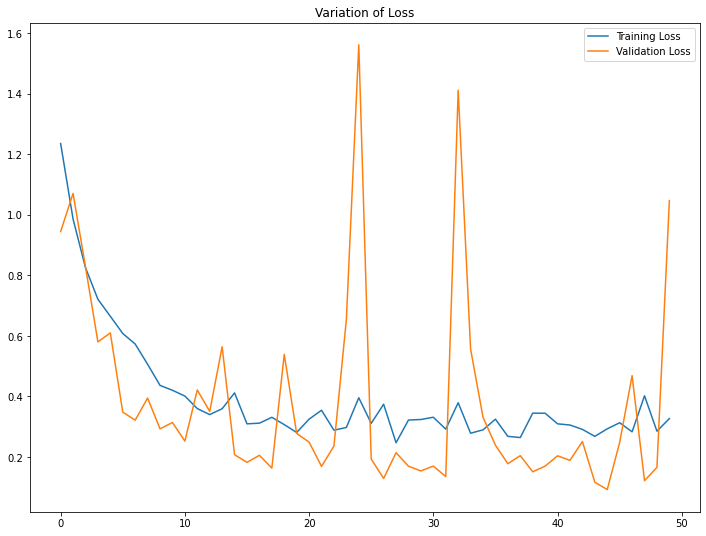

In [ ]:
plt.figure(figsize = (12, 9))

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Variation of Loss')
plt.legend()

### Look for the classification of some feature

In [ ]:
!ls "drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/GrapeImages"

 Grape___Black_rot		 Grape___healthy
'Grape___Esca_(Black_Measles)'	'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'


In [ ]:
class_dict = {'Grape___Black_rot':0, 'Grape___healthy':2,
              'Grape___Esca_':1, 'Grape___Leaf_blight_':3}
num_to_class = {b:a for a,b in class_dict.items()}
img_size = 128
def testsample(model, **kwargs):
    for item in kwargs:
        print(item)
        pred = model.predict(kwargs[item])
        temp_img = kwargs[item][0].reshape((img_size, img_size, 3)).copy()
        c = plt.imshow(temp_img)
        plt.colorbar(c)
        plt.title(f'Predicted Class is {num_to_class[pred.argmax()]}\nActual Clas is {item}')
        plt.show()

In [ ]:
X, y = next(validation_generator)
y1 = y.argmax(axis = 1)
X.shape, y1.shape

((16, 128, 128, 3), (16,))

In [ ]:
Grape___Black_rot = X[y1 == 0][1:2]
Grape___healthy = X[y1 == 2][:1]
Grape___Esca_ = X[y1 == 1][:1]
Grape___Leaf_blight_ = X[y1 == 3][:1]

Grape___Black_rot


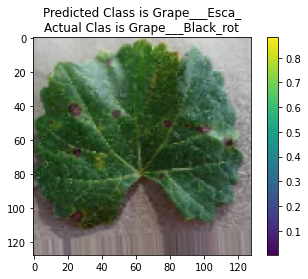

Grape___healthy


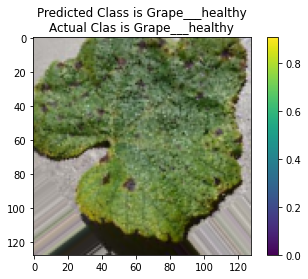

Grape___Leaf_blight_


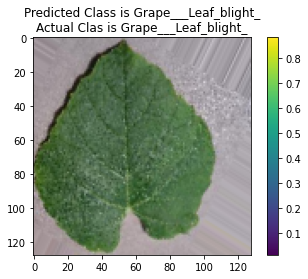

Grape___Esca_


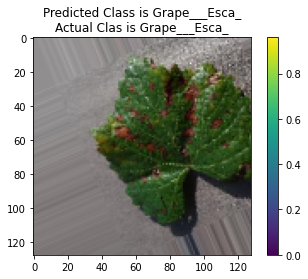

In [ ]:
testsample(model, Grape___Black_rot = Grape___Black_rot.reshape((-1, 128, 128, 3)), 
           Grape___healthy = Grape___healthy.reshape((-1, 128, 128, 3)), 
           Grape___Leaf_blight_ = Grape___Leaf_blight_.reshape((-1, 128, 128, 3)), 
           Grape___Esca_ = Grape___Esca_.reshape((-1, 128, 128, 3)))

In [ ]:
# !ls -lha kaggle.json

In [ ]:
# !pip install -q kaggle

In [ ]:
# !mkdir -p ~/.kaggle

In [ ]:
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !pwd

In [ ]:
# !kaggle datasets download -d abdallahalidev/plantvillage-dataset

In [ ]:
# !ls

In [ ]:
# !unzip plantvillage-dataset.zip -d 'drive/MyDrive/TeacherOn Assignment/Akash_code/Project2/'

In [ ]:
!mv plantvillage-dataset.zip drive/MyDrive/TeacherOn\ Assignment/Akash_code/